In [1]:
#importing all necessary libraries
import os
import re

#importing libraries needed for data analysis
import numpy as np
import pandas as pd

#importing libraries needed for data visualization
import matplotlib.pyplot as plt

#libraries used for analysing images
import skimage.io
import skimage.feature
import skimage.transform
from glob import glob

# Loading the data

In [2]:
#extract the data from the folder
folders = os.listdir('./Data')

In [3]:
folders

['test', 'train']

In [4]:
glob('./data/train/{}/*.jpg'.format('PNEUMONIA'))

['./data/train/PNEUMONIA\\PNEUMONIA(0).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(10).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(100).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1000).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1001).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1002).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1003).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1004).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1005).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1006).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1007).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1008).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1009).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(101).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1010).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1011).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1012).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1013).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1014).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1015).jpg',
 '

In [5]:
glob('./data/train/{}/*.jpg'.format('COVID19'))

['./data/train/COVID19\\COVID19(0).jpg',
 './data/train/COVID19\\COVID19(1).jpg',
 './data/train/COVID19\\COVID19(10).jpg',
 './data/train/COVID19\\COVID19(100).jpg',
 './data/train/COVID19\\COVID19(101).jpg',
 './data/train/COVID19\\COVID19(102).jpg',
 './data/train/COVID19\\COVID19(103).jpg',
 './data/train/COVID19\\COVID19(104).jpg',
 './data/train/COVID19\\COVID19(105).jpg',
 './data/train/COVID19\\COVID19(106).jpg',
 './data/train/COVID19\\COVID19(107).jpg',
 './data/train/COVID19\\COVID19(108).jpg',
 './data/train/COVID19\\COVID19(109).jpg',
 './data/train/COVID19\\COVID19(11).jpg',
 './data/train/COVID19\\COVID19(110).jpg',
 './data/train/COVID19\\COVID19(111).jpg',
 './data/train/COVID19\\COVID19(112).jpg',
 './data/train/COVID19\\COVID19(113).jpg',
 './data/train/COVID19\\COVID19(114).jpg',
 './data/train/COVID19\\COVID19(115).jpg',
 './data/train/COVID19\\COVID19(116).jpg',
 './data/train/COVID19\\COVID19(117).jpg',
 './data/train/COVID19\\COVID19(118).jpg',
 './data/train/CO

In [6]:
glob('./data/train/{}/*.jpg'.format('PNEUMONIA'))

['./data/train/PNEUMONIA\\PNEUMONIA(0).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(10).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(100).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1000).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1001).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1002).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1003).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1004).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1005).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1006).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1007).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1008).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1009).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(101).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1010).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1011).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1012).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1013).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1014).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1015).jpg',
 '

In [7]:
folders

['test', 'train']

In [8]:
train_direc = "./Data/train"
test_direc = "./Data/test"

In [9]:
print(os.listdir(train_direc))

['COVID19', 'NORMAL', 'PNEUMONIA']


In [10]:
print(os.listdir(test_direc))

['COVID19', 'NORMAL', 'PNEUMONIA']


**Identify number of images in train and test folder**

In [11]:
len(os.listdir(train_direc+"/COVID19"))

460

In [12]:
len(os.listdir(train_direc+"/NORMAL"))

1266

In [13]:
len(os.listdir(train_direc+"/PNEUMONIA"))

3418

In [14]:
len(os.listdir(test_direc+"/COVID19"))

116

In [15]:
len(os.listdir(test_direc+"/NORMAL"))

317

In [16]:
len(os.listdir(test_direc+"/PNEUMONIA"))

855

# Lets Visualize an image

**A person with pneumonia**

In [17]:
sample1 = plt.imread(train_direc+"/PNEUMONIA"+"/PNEUMONIA(3415).jpg")

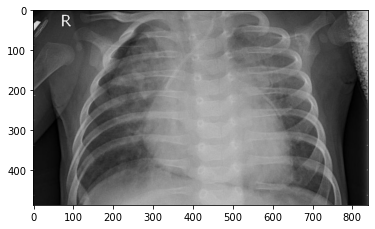

In [18]:
plt.imshow(sample1,cmap='gray')

In [19]:
sample1.shape

(488, 840, 3)

In [20]:
sample2 = plt.imread(train_direc+"/PNEUMONIA"+"/PNEUMONIA(3413).jpg")

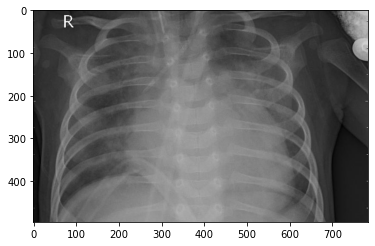

In [21]:
plt.imshow(sample2,cmap='gray')

In [22]:
sample2.shape

(496, 784, 3)

**Upon Observing the shape of both the data we can say that size of the the image is not same and we have to change the size and there are 3 channels. So we have to convert into gray scale**

# Data Cleaning

In [23]:
img_size = (250,250)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./225, 
                                   samplewise_center = True,
                                   samplewise_std_normalization = True,
                                   rotation_range = 0,
                                   horizontal_flip = True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./225)

train_generator = train_datagen.flow_from_directory(train_direc,
                                                    target_size = img_size,
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_direc,
                                                    target_size = img_size,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = False)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [26]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [27]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, BatchNormalization,UpSampling2D,GlobalAveragePooling2D,Dropout,Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# LeNet

In [28]:
import tensorflow as tf

In [29]:
from keras.callbacks import LearningRateScheduler

In [30]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(250, 250, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 246, 246, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 123, 123, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 16)      2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 55696)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               6683640   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [31]:
#supress the warnings
import warnings
warnings.filterwarnings('ignore')

import time
t = time.time()
train_model = model.fit_generator(train_generator,steps_per_epoch=5,epochs=25,validation_data=test_generator)
print('Training time: %s' % (t - time.time()))

Epoch 1/25
5/5 [==============================] - 34s 8s/step - loss: 4.2977 - accuracy: 0.5750 - val_loss: 1.0286 - val_accuracy: 0.6638
Epoch 2/25
5/5 [==============================] - 31s 7s/step - loss: 1.9725 - accuracy: 0.7000 - val_loss: 1.0484 - val_accuracy: 0.6957
Epoch 3/25
5/5 [==============================] - 32s 8s/step - loss: 0.6844 - accuracy: 0.7312 - val_loss: 1.0146 - val_accuracy: 0.8261
Epoch 4/25
5/5 [==============================] - 31s 8s/step - loss: 0.6734 - accuracy: 0.7188 - val_loss: 1.0021 - val_accuracy: 0.6848
Epoch 5/25
5/5 [==============================] - 33s 8s/step - loss: 0.5443 - accuracy: 0.7750 - val_loss: 1.0079 - val_accuracy: 0.7352
Epoch 6/25
5/5 [==============================] - 32s 8s/step - loss: 0.4157 - accuracy: 0.8313 - val_loss: 0.9939 - val_accuracy: 0.7127
Epoch 7/25
5/5 [==============================] - 33s 8s/step - loss: 0.4611 - accuracy: 0.8500 - val_loss: 0.9923 - val_accuracy: 0.8370
Epoch 8/25
5/5 [==================

# Plot

In [51]:
def plot_losses_and_accuracies(train_model,x):
    epochs = [i for i in range(x)]
    fig , ax = plt.subplots(1,2)
    train_acc = train_model.history['accuracy']
    train_loss = train_model.history['loss']
    val_acc = train_model.history['val_accuracy']
    val_loss = train_model.history['val_loss']
    fig.set_size_inches(25,10)
    ax[0].plot(epochs , train_acc , 'bo-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'b-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

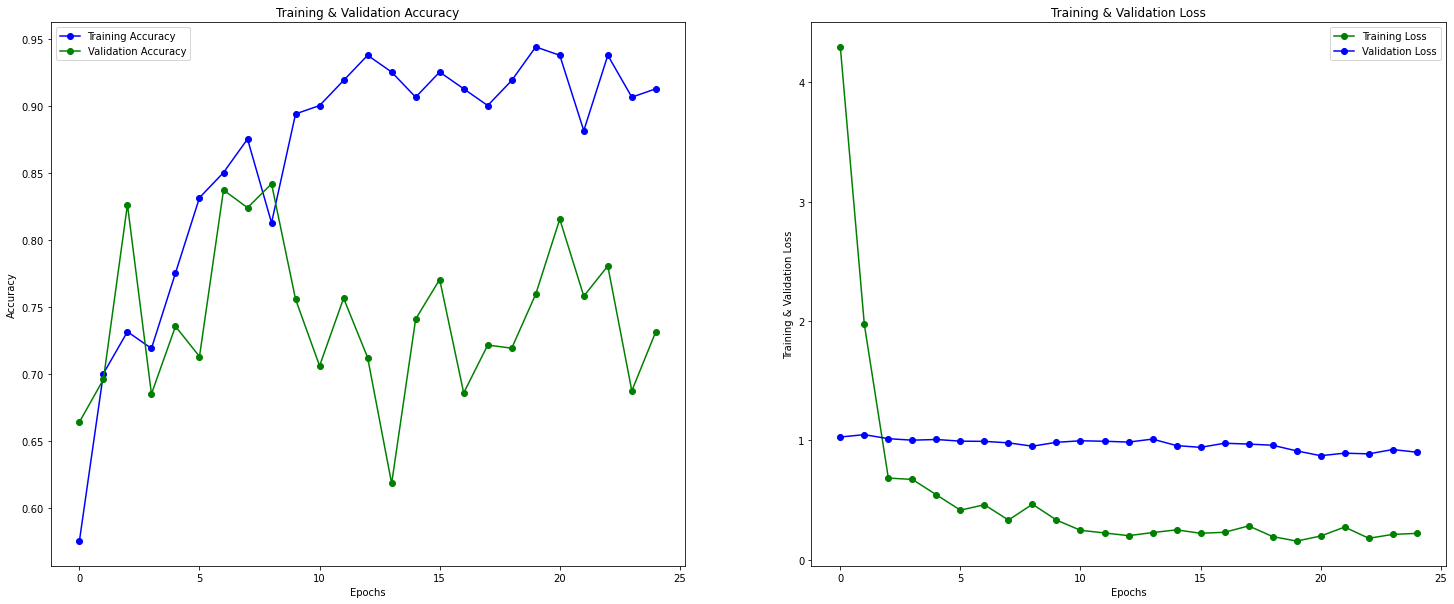

In [52]:
epochs=25
plot_losses_and_accuracies(train_model,epochs)

In [40]:
scores = model.evaluate_generator(test_generator)

In [44]:
print("Accuracy obtained on test data is: ",scores[1])

Accuracy obtained on test data is:  0.7313664555549622
